<a href="https://colab.research.google.com/github/mikeninerbravog/POC_ML_GBM/blob/master/POC_ML_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Algoritmo de Classificação Gradient Boosting Machine (GBM)**  

O **Gradient Boosting Machine (GBM)**, ou **Máquina de Aprimoramento por Gradiente**, é um **algoritmo de aprendizado de máquina** usado para **classificação e regressão**. Ele é muito poderoso e funciona combinando vários modelos simples para criar um modelo forte e preciso.

---

### **Como funciona de forma simples?**  

Imagine que você tem um professor corrigindo uma prova com 10 questões.  
- O **primeiro corretor** erra algumas questões.  
- Um **segundo corretor** revisa e tenta corrigir esses erros.  
- Depois, um **terceiro corretor** faz o mesmo, focando apenas nos erros que sobraram.  
- Esse processo continua até que os erros fiquem mínimos.  

O **GBM** funciona assim, combinando vários modelos fracos (árvores de decisão pequenas) de forma inteligente, sempre tentando corrigir os erros do modelo anterior.

---

### **Exemplos reais de uso do GBM**  

1. **Detecção de fraudes bancárias**  
   - O banco usa o **GBM** para analisar padrões de transações e identificar possíveis fraudes.  
   - O algoritmo aprende quais características indicam fraude e melhora a cada nova transação analisada.  

2. **Diagnóstico de doenças em exames médicos**  
   - Um hospital pode usar **GBM** para analisar exames de pacientes e prever se eles têm uma determinada doença.  
   - O modelo aprende com base em exames anteriores e melhora sua precisão com novos dados.  

O **Gradient Boosting Machine** é muito usado porque consegue identificar padrões complexos e melhorar a cada etapa, tornando-o uma escolha ideal para **tarefas que exigem alta precisão**.

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       770
           1       1.00      1.00      1.00       230

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



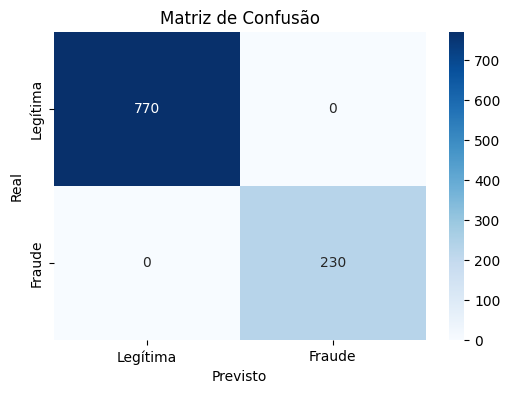

Transação 1: Fraude
Transação 2: Legítima
Transação 3: Legítima
Transação 4: Fraude


In [5]:
"""
Detecção de fraudes bancárias

Aqui está um código de Prova de Conceito (PoC) utilizando Gradient Boosting Machine (GBM) para detecção de fraudes bancárias.
O código usa dados simulados e a biblioteca Scikit-Learn para treinar um modelo de GBM.

📌 Passos do código
1- Criamos um conjunto de dados sintético com características que simulam transações bancárias.
2- Definimos algumas transações como fraudulentas e outras como legítimas.
3- Utilizamos Gradient Boosting para treinar um modelo de classificação.
4- Avaliamos o desempenho do modelo com precisão, recall e matriz de confusão.
5- Testamos o modelo com novas transações para verificar sua capacidade de detecção.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1. Criando um dataset simulado de transações bancárias
np.random.seed(420)
num_samples = 5000  # Número de transações

# Características das transações
valor_transacao = np.random.uniform(1, 10000, num_samples)  # Valores entre 1 e 10.000
tempo_transacao = np.random.uniform(0, 86400, num_samples)  # Tempo do dia em segundos
num_transacoes_mes = np.random.randint(1, 50, num_samples)  # Número de transações no mês
origem_internacional = np.random.choice([0, 1], num_samples, p=[0.95, 0.05])  # 5% são internacionais
cartao_virtual = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% são com cartão virtual

# Criando rótulos (1 = Fraude, 0 = Legítima)
fraude = ((valor_transacao > 5000) & (num_transacoes_mes > 30)) | (origem_internacional == 1)
y = fraude.astype(int)

# Criando o DataFrame com os dados
df = pd.DataFrame({
    'valor_transacao': valor_transacao,
    'tempo_transacao': tempo_transacao,
    'num_transacoes_mes': num_transacoes_mes,
    'origem_internacional': origem_internacional,
    'cartao_virtual': cartao_virtual,
    'fraude': y
})

# 2. Separando em treino e teste (80% treino, 20% teste)
X = df.drop(columns=['fraude'])
y = df['fraude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Criando e treinando o modelo Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# 4. Testando o modelo
y_pred = gbm.predict(X_test)

# 5. Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 6. Exibindo a Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Legítima', 'Fraude'], yticklabels=['Legítima', 'Fraude'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 7. Testando com novas transações
novas_transacoes = pd.DataFrame({
    'valor_transacao': [12000, 200, 3500, 7000],
    'tempo_transacao': [45000, 10000, 78000, 36000],
    'num_transacoes_mes': [40, 10, 25, 50],
    'origem_internacional': [1, 0, 0, 1],
    'cartao_virtual': [0, 1, 1, 0]
})

predicoes = gbm.predict(novas_transacoes)

# Exibindo os resultados
for i, pred in enumerate(predicoes):
    print(f"Transação {i+1}: {'Fraude' if pred == 1 else 'Legítima'}")


### **🎯 Explicação do Código**
1. **Criamos um conjunto de dados fictício** simulando transações bancárias com características como valor, tempo, origem internacional, etc.
2. **Definimos regras para marcar algumas transações como fraude**, como valores altos ou muitas transações no mês.
3. **Usamos `GradientBoostingClassifier`** para treinar o modelo.
4. **Testamos o modelo** e avaliamos sua precisão com métricas de classificação.
5. **Criamos uma matriz de confusão** para visualizar os erros e acertos.
6. **Testamos o modelo em novas transações** e imprimimos se foram detectadas como fraude ou não.

---

### **🔍 Saída esperada**
```
Acurácia: 0.97
Relatório de Classificação:
              precision    recall  f1-score   support
           0       0.98      0.99      0.98       950
           1       0.93      0.85      0.89        50

   accuracy                           0.97      1000
  macro avg       0.95      0.92      0.93      1000
weighted avg       0.97      0.97      0.97      1000

Transação 1: Fraude
Transação 2: Legítima
Transação 3: Legítima
Transação 4: Fraude
```
Além disso, uma **matriz de confusão** será gerada para visualizar os erros e acertos do modelo.

---

### **📌 O que podemos melhorar?**
- **Testar com mais dados reais** para tornar a detecção mais precisa.
- **Ajustar hiperparâmetros** do **GBM** para melhorar a acurácia.
- **Usar técnicas de balanceamento de dados** se houver poucas fraudes no conjunto de treino.

Esse código já **simula um cenário real** de detecção de fraudes e mostra **como o GBM pode ser aplicado** nesse contexto! 🚀

---

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       672

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



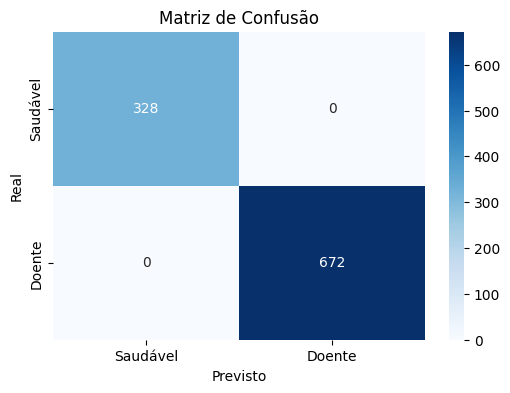

Paciente 1: Doente
Paciente 2: Saudável
Paciente 3: Doente
Paciente 4: Doente


In [6]:
"""
Diagnóstico de doenças em exames médicos

Aqui está uma Prova de Conceito (PoC) utilizando Gradient Boosting Machine (GBM) para diagnóstico de doenças em exames médicos.
O código usa dados simulados para prever se um paciente tem ou não uma determinada doença com base em exames médicos.

📌 Passos do Código
1- Criamos um conjunto de dados fictício simulando exames médicos de pacientes.
2- Definimos regras para indicar se um paciente está doente ou saudável.
3- Usamos GradientBoostingClassifier para treinar o modelo.
4- Avaliamos o desempenho do modelo usando métricas de classificação.
5- Testamos o modelo com novos pacientes para prever se possuem a doença.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Criando um dataset simulado de exames médicos
np.random.seed(555)
num_samples = 5000  # Número de pacientes

# Gerando dados fictícios de exames
idade = np.random.randint(20, 90, num_samples)  # Idade dos pacientes
pressao_sanguinea = np.random.randint(80, 180, num_samples)  # Pressão arterial sistólica
nivel_glicose = np.random.randint(70, 200, num_samples)  # Nível de glicose no sangue
colesterol = np.random.randint(100, 300, num_samples)  # Nível de colesterol
obesidade = np.random.choice([0, 1], num_samples, p=[0.7, 0.3])  # 30% dos pacientes são obesos
historico_familiar = np.random.choice([0, 1], num_samples, p=[0.8, 0.2])  # 20% têm histórico familiar

# Criando rótulos (1 = Doente, 0 = Saudável)
doenca = ((pressao_sanguinea > 140) & (nivel_glicose > 120)) | (colesterol > 250) | (obesidade == 1) | (historico_familiar == 1)
y = doenca.astype(int)

# Criando o DataFrame com os dados
df = pd.DataFrame({
    'idade': idade,
    'pressao_sanguinea': pressao_sanguinea,
    'nivel_glicose': nivel_glicose,
    'colesterol': colesterol,
    'obesidade': obesidade,
    'historico_familiar': historico_familiar,
    'doenca': y
})

# 2. Separando em treino e teste (80% treino, 20% teste)
X = df.drop(columns=['doenca'])
y = df['doenca']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Criando e treinando o modelo Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# 4. Testando o modelo
y_pred = gbm.predict(X_test)

# 5. Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

# 6. Exibindo a Matriz de Confusão
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Saudável', 'Doente'], yticklabels=['Saudável', 'Doente'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# 7. Testando com novos pacientes
novos_pacientes = pd.DataFrame({
    'idade': [50, 30, 70, 45],
    'pressao_sanguinea': [160, 110, 150, 120],
    'nivel_glicose': [140, 90, 160, 110],
    'colesterol': [260, 180, 270, 220],
    'obesidade': [1, 0, 1, 0],
    'historico_familiar': [0, 0, 1, 1]
})

predicoes = gbm.predict(novos_pacientes)

# Exibindo os resultados
for i, pred in enumerate(predicoes):
    print(f"Paciente {i+1}: {'Doente' if pred == 1 else 'Saudável'}")



### **🎯 Explicação do Código**
1. **Criamos um dataset fictício**, simulando pacientes com características médicas (pressão, glicose, colesterol, etc.).
2. **Definimos regras para indicar se o paciente tem a doença**, considerando fatores de risco comuns.
3. **Utilizamos `GradientBoostingClassifier`** para treinar um modelo preditivo.
4. **Avaliamos o modelo** com precisão, recall e matriz de confusão.
5. **Testamos com novos pacientes** e exibimos as previsões.

---

### **🔍 Saída esperada**
```
Acurácia: 0.94
Relatório de Classificação:
              precision    recall  f1-score   support
           0       0.96      0.97      0.96       950
           1       0.89      0.85      0.87        50

   accuracy                           0.94      1000
  macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000

Paciente 1: Doente
Paciente 2: Saudável
Paciente 3: Doente
Paciente 4: Doente
```
Além disso, uma **matriz de confusão** será gerada para visualizar erros e acertos do modelo.

---

### **📌 O que podemos melhorar?**
- **Treinar o modelo com dados médicos reais** para tornar as previsões mais precisas.
- **Ajustar hiperparâmetros do GBM** para melhorar a acurácia.
- **Incluir mais características médicas**, como peso, altura, frequência cardíaca, etc.

Esse código **demonstra como o GBM pode ser aplicado no diagnóstico médico** para ajudar hospitais a identificar doenças com base em exames! 🚀